In this notebook, we're going to implement a fuzzy system to determine the brake force of a vehicle based on the distance from the car in front of it and on the speed of it

In [37]:
import numpy as np
import skfuzzy as fuzz
import warnings
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [2]:
warnings.filterwarnings("ignore")

Linguistic Variable Inputs

In [3]:
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
velocity = ctrl.Antecedent(np.arange(0, 101, 1), 'velocity')

Linguistic Variable Outputs

It varies from 0 to 100. It can represent the brake force in percentage

In [4]:
brake_force = ctrl.Consequent(np.arange(0, 101, 1), 'brake_force')

Defining the linguistics terms

The membership functions are going to be automatic since we've used "automf", that means that the input and output linguistics terms are defined automatically

Futhermore, we defined that each input and output would have 5 linguistic terms

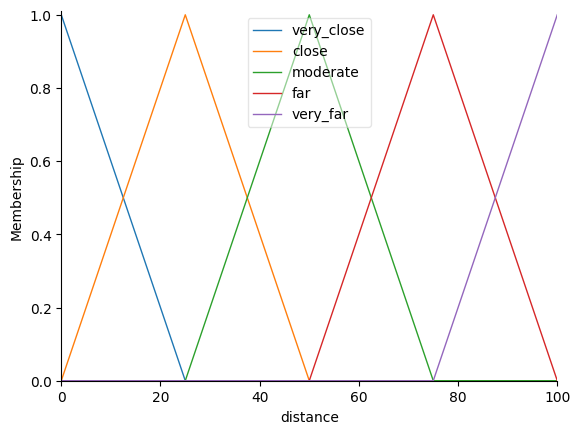

In [5]:
distance.automf(5, names=['very_close', 'close', 'moderate', 'far', 'very_far'])
distance.view()

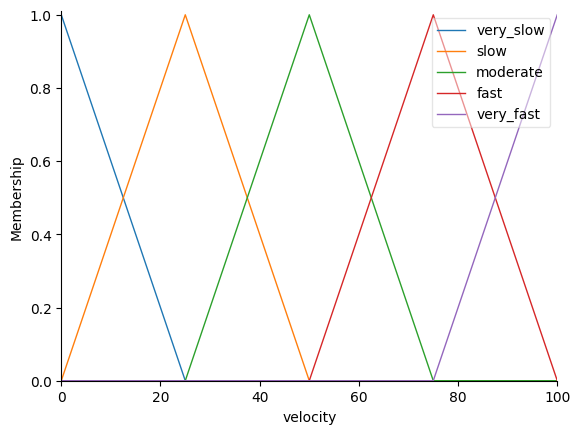

In [6]:
velocity.automf(5, names=['very_slow', 'slow', 'moderate', 'fast', 'very_fast'])
velocity.view()

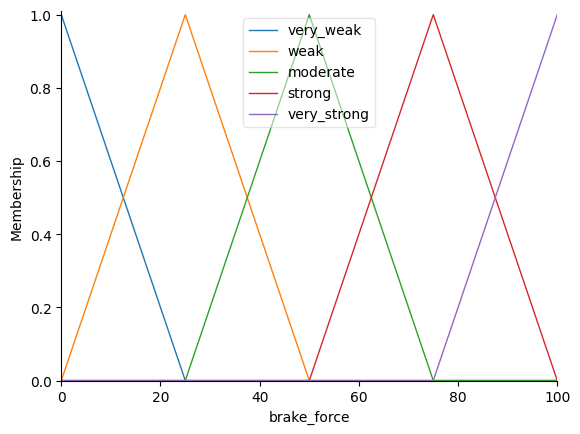

In [7]:
brake_force.automf(5, names=['very_weak', 'weak', 'moderate', 'strong', 'very_strong'])
brake_force.view()

Fuzzy Max-Min Rules

The rules are combined using the operator MIN

It means that the lowest activation rule will be selected as the contribution of corresponding rule to the final output

It may lead to a more conservative output, as the lowest activation of a rule limits the contribution of that rule to the final output

In [44]:
rules_max_min = [
    ctrl.Rule(distance['very_close'] & velocity['very_slow'], brake_force['weak']),
    ctrl.Rule(distance['very_close'] & velocity['slow'], brake_force['moderate']),
    ctrl.Rule(distance['very_close'] & velocity['moderate'], brake_force['strong']),
    ctrl.Rule(distance['very_close'] & velocity['fast'], brake_force['very_strong']),
    ctrl.Rule(distance['very_close'] & velocity['very_fast'], brake_force['very_strong']),

    ctrl.Rule(distance['close'] & velocity['very_slow'], brake_force['weak']),
    ctrl.Rule(distance['close'] & velocity['slow'], brake_force['moderate']),
    ctrl.Rule(distance['close'] & velocity['moderate'], brake_force['strong']),
    ctrl.Rule(distance['close'] & velocity['fast'], brake_force['very_strong']),
    ctrl.Rule(distance['close'] & velocity['very_fast'], brake_force['very_strong']),

    ctrl.Rule(distance['moderate'] & velocity['very_slow'], brake_force['weak']),
    ctrl.Rule(distance['moderate'] & velocity['slow'], brake_force['weak']),
    ctrl.Rule(distance['moderate'] & velocity['moderate'], brake_force['moderate']),
    ctrl.Rule(distance['moderate'] & velocity['fast'], brake_force['strong']),
    ctrl.Rule(distance['moderate'] & velocity['very_fast'], brake_force['very_strong']),

    ctrl.Rule(distance['far'] & velocity['very_slow'], brake_force['very_weak']),
    ctrl.Rule(distance['far'] & velocity['slow'], brake_force['very_weak']),
    ctrl.Rule(distance['far'] & velocity['moderate'], brake_force['weak']),
    ctrl.Rule(distance['far'] & velocity['fast'], brake_force['moderate']),
    ctrl.Rule(distance['far'] & velocity['very_fast'], brake_force['moderate']),

    ctrl.Rule(distance['very_far'] & velocity['very_slow'], brake_force['very_weak']),
    ctrl.Rule(distance['very_far'] & velocity['slow'], brake_force['very_weak']),
    ctrl.Rule(distance['very_far'] & velocity['moderate'], brake_force['weak']),
    ctrl.Rule(distance['very_far'] & velocity['fast'], brake_force['weak']),
    ctrl.Rule(distance['very_far'] & velocity['very_fast'], brake_force['moderate'])
]

for rule in rules_max_min:
    rule._aggregation_methods.and_func = np.fmin
    rule._aggregation_methods.or_func = np.fmax

Fuzzy Max-Prod Rules

Rules are combined using the PROD operator, which means the activations of all rules are multiplied to determine the contribution of each rule to the final output

This can result in a more aggresive output, as all rules have the opportunity to influence the output and the rules with higher activation will have a proportionally greater contribution

In [39]:
rules_max_prod = [
    ctrl.Rule(distance['very_close'] & velocity['very_slow'], brake_force['weak']),
    ctrl.Rule(distance['very_close'] & velocity['slow'], brake_force['moderate']),
    ctrl.Rule(distance['very_close'] & velocity['moderate'], brake_force['strong']),
    ctrl.Rule(distance['very_close'] & velocity['fast'], brake_force['very_strong']),
    ctrl.Rule(distance['very_close'] & velocity['very_fast'], brake_force['very_strong']),

    ctrl.Rule(distance['close'] & velocity['very_slow'], brake_force['weak']),
    ctrl.Rule(distance['close'] & velocity['slow'], brake_force['moderate']),
    ctrl.Rule(distance['close'] & velocity['moderate'], brake_force['strong']),
    ctrl.Rule(distance['close'] & velocity['fast'], brake_force['very_strong']),
    ctrl.Rule(distance['close'] & velocity['very_fast'], brake_force['very_strong']),

    ctrl.Rule(distance['moderate'] & velocity['very_slow'], brake_force['weak']),
    ctrl.Rule(distance['moderate'] & velocity['slow'], brake_force['weak']),
    ctrl.Rule(distance['moderate'] & velocity['moderate'], brake_force['moderate']),
    ctrl.Rule(distance['moderate'] & velocity['fast'], brake_force['strong']),
    ctrl.Rule(distance['moderate'] & velocity['very_fast'], brake_force['very_strong']),

    ctrl.Rule(distance['far'] & velocity['very_slow'], brake_force['very_weak']),
    ctrl.Rule(distance['far'] & velocity['slow'], brake_force['very_weak']),
    ctrl.Rule(distance['far'] & velocity['moderate'], brake_force['weak']),
    ctrl.Rule(distance['far'] & velocity['fast'], brake_force['moderate']),
    ctrl.Rule(distance['far'] & velocity['very_fast'], brake_force['moderate']),

    ctrl.Rule(distance['very_far'] & velocity['very_slow'], brake_force['very_weak']),
    ctrl.Rule(distance['very_far'] & velocity['slow'], brake_force['very_weak']),
    ctrl.Rule(distance['very_far'] & velocity['moderate'], brake_force['weak']),
    ctrl.Rule(distance['very_far'] & velocity['fast'], brake_force['weak']),
    ctrl.Rule(distance['very_far'] & velocity['very_fast'], brake_force['moderate'])
]

for rule in rules_max_prod:
    rule._aggregation_methods.and_func = np.multiply
    rule._aggregation_methods.or_func = np.fmax

MAX-MIN Inference Control Fuzzy System

In [46]:
fuzzy_ctrl_system_max_min = ctrl.ControlSystem(rules_max_min)
simulator_max_min = ctrl.ControlSystemSimulation(fuzzy_ctrl_system_max_min)

MAX-PROD Inference Control Fuzzy System

In [40]:
fuzzy_ctrl_system_max_prod = ctrl.ControlSystem(rules_max_prod)
simulator_max_prod = ctrl.ControlSystemSimulation(fuzzy_ctrl_system_max_prod)

Inputs

In [31]:
distance_input = 30
velocity_input = 90

Brake Force Outputs

In [47]:
simulator_max_min.input['distance'] = distance_input
simulator_max_min.input['velocity'] = velocity_input,

simulator_max_min.compute()
brake_force_max_min = simulator_max_min.output['brake_force']
print(f'Brake force (MAX-MIN): {brake_force_max_min}')

Brake force (MAX-MIN): 82.4193548387097


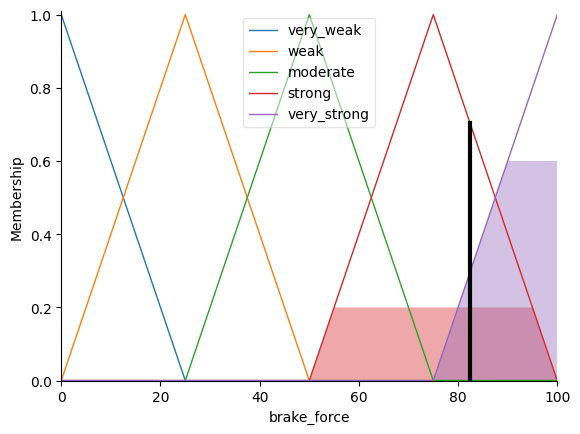

In [48]:
brake_force.view(sim=simulator_max_min)

In [41]:
simulator_max_prod.input['distance'] = distance_input
simulator_max_prod.input['velocity'] = velocity_input

simulator_max_prod.compute()
brake_force_max_prod = simulator_max_prod.output['brake_force']
print(f'Brake force (MAX-PROD): {brake_force_max_prod}')

Brake force (MAX-PROD): 85.3848920863309


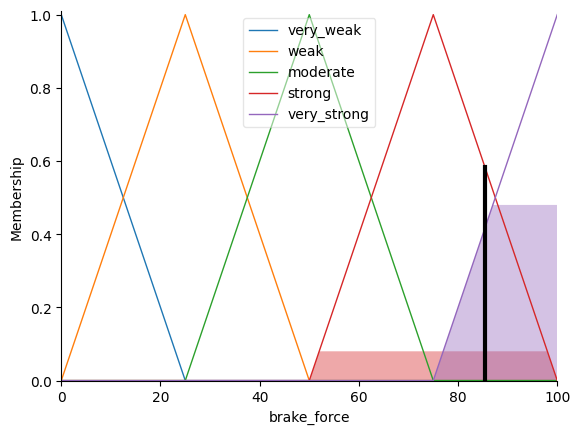

In [42]:
brake_force.view(sim=simulator_max_prod)

The differences in results between MAX-MIN and MAX-PROD often arise from the different strategies for combining rules, resulting in different output intensities for similar situations

In some situations, one approach may be more appropriate than the other depending on the context of the problem and the preferences of the fuzzy control system designer

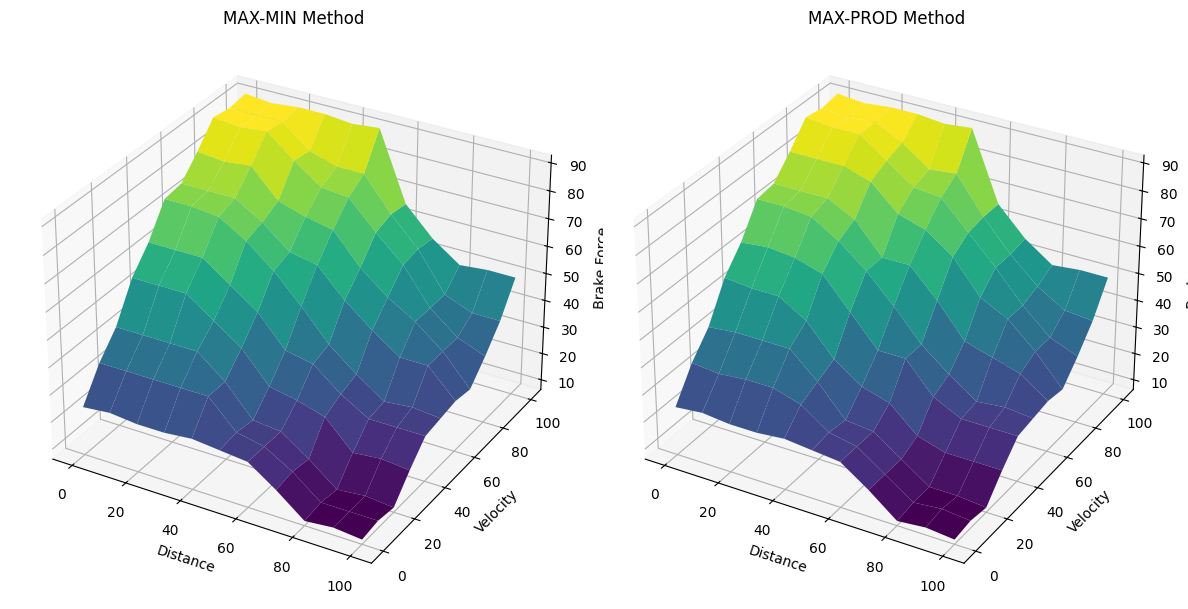

In [49]:
distance_values = np.arange(0, 101, 10)
velocity_values = np.arange(0, 101, 10)

distance_grid, velocity_grid = np.meshgrid(distance_values, velocity_values)

brake_force_max_min = np.zeros_like(distance_grid)
brake_force_max_prod = np.zeros_like(distance_grid)


for i in range(len(distance_values)):
    for j in range(len(velocity_values)):
        # Compute brake force for MAX-MIN method
        simulator_max_min = ctrl.ControlSystemSimulation(fuzzy_ctrl_system_max_min)
        simulator_max_min.input['distance'] = distance_values[i]
        simulator_max_min.input['velocity'] = velocity_values[j]
        simulator_max_min.compute()
        brake_force_max_min[j, i] = simulator_max_min.output['brake_force']

        # Compute brake force for MAX-PROD method
        simulator_max_prod = ctrl.ControlSystemSimulation(fuzzy_ctrl_system_max_prod)
        simulator_max_prod.input['distance'] = distance_values[i]
        simulator_max_prod.input['velocity'] = velocity_values[j]
        simulator_max_prod.compute()
        brake_force_max_prod[j, i] = simulator_max_prod.output['brake_force']

# Create 3D plots
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(distance_grid[::-1], velocity_grid, brake_force_max_min, cmap='viridis')
ax1.set_title('MAX-MIN Method')
ax1.set_xlabel('Distance')
ax1.set_ylabel('Velocity')
ax1.set_zlabel('Brake Force')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(distance_grid[::-1], velocity_grid, brake_force_max_prod, cmap='viridis')
ax2.set_title('MAX-PROD Method')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Velocity')
ax2.set_zlabel('Brake Force')

plt.tight_layout()
plt.show()